In [2]:
#!pip install missingno
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import missingno as msno


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.isnull().sum(axis=0)

ID                        0
Warehouse_block           0
Mode_of_Shipment          0
Customer_care_calls    1576
Customer_rating           0
Cost_of_the_Product       0
Prior_purchases         950
Product_importance        0
Gender                    0
Discount_offered       3531
Weight_in_gms             0
Reached.on.Time_Y.N       0
dtype: int64

<Axes: >

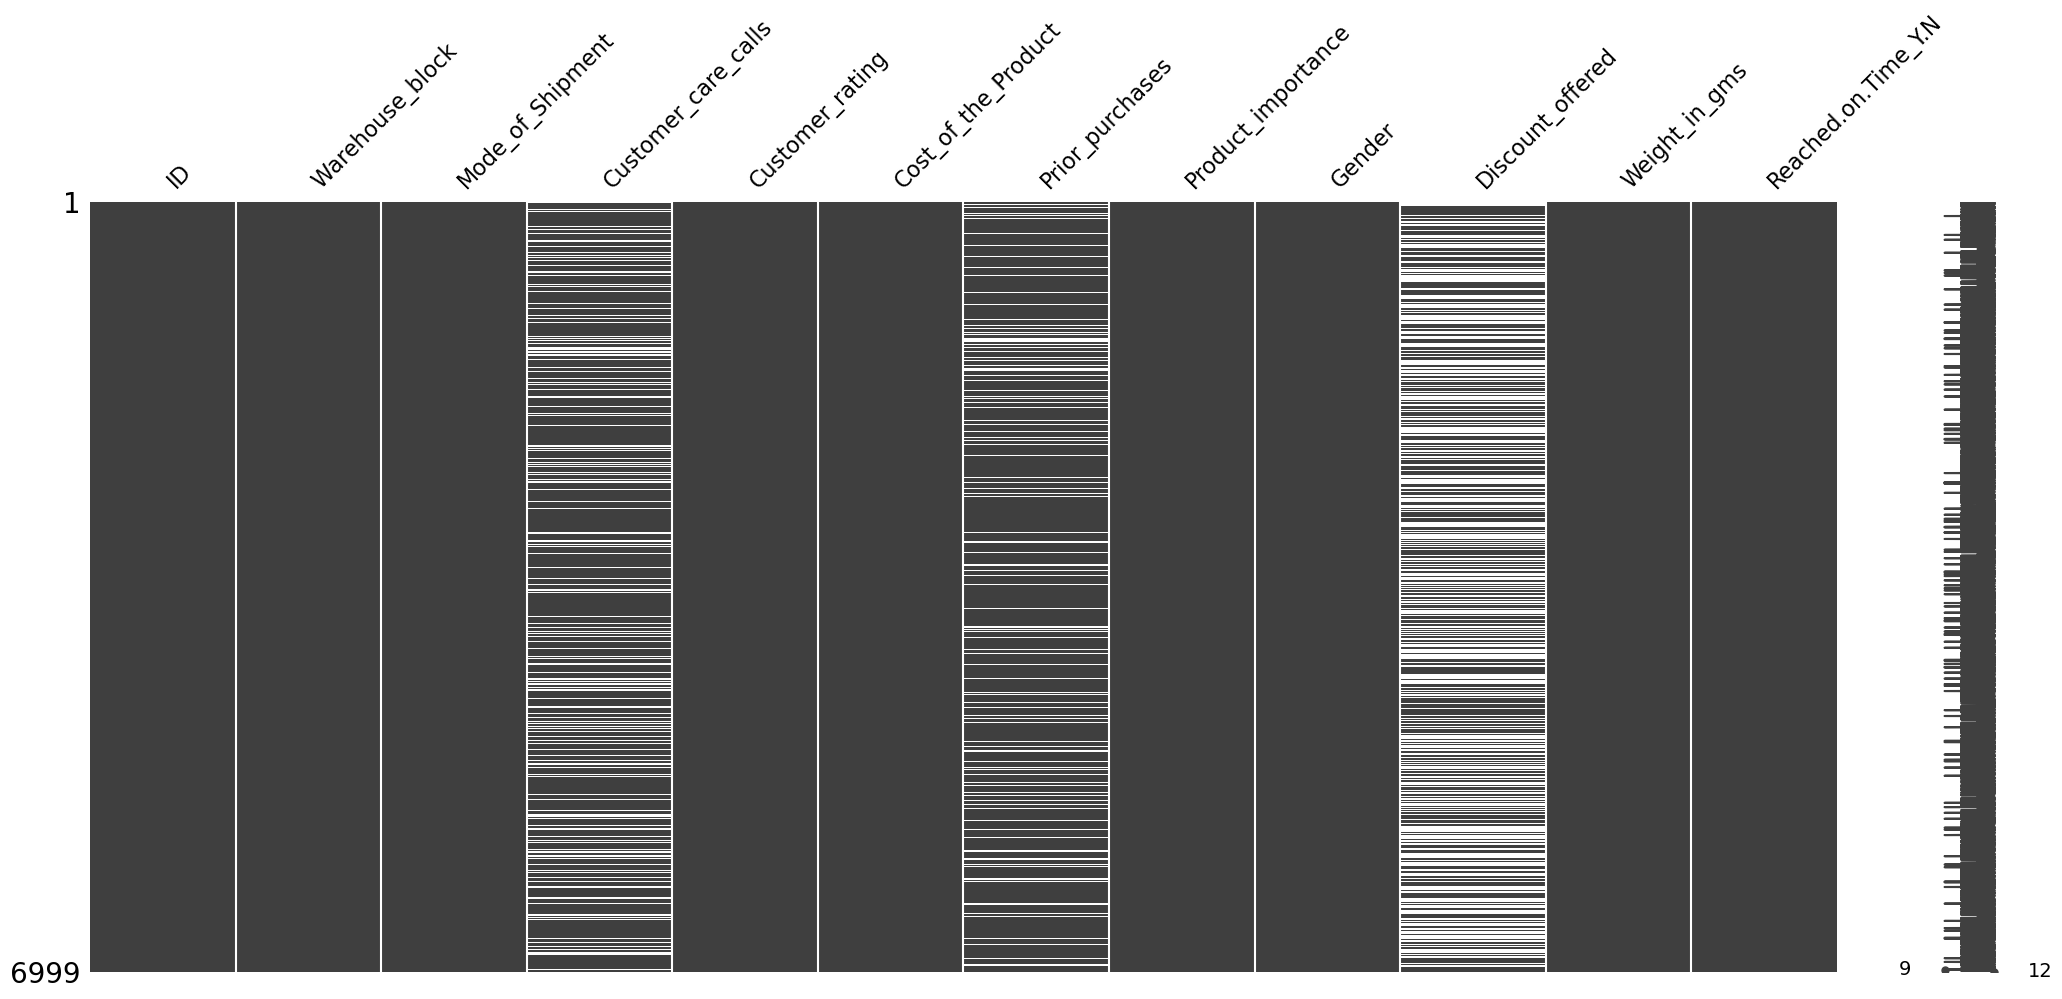

In [5]:
msno.matrix(train)


In [6]:
train.corr()

C:\Users\heewo\AppData\Local\Temp\ipykernel_20604\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
ID,1.000000,-0.007719,0.007690,0.009738,-0.002985,0.002196,-0.014909
Customer_care_calls,-0.007719,1.000000,0.013420,0.047041,0.173709,-0.158465,-0.070266
Customer_rating,0.007690,0.013420,1.000000,-0.001961,0.008217,-0.016456,0.011275
Cost_of_the_Product,0.009738,0.047041,-0.001961,1.000000,0.028947,-0.139349,-0.012811
Prior_purchases,-0.002985,0.173709,0.008217,0.028947,1.000000,-0.081868,-0.065160
Discount_offered,0.002196,-0.158465,-0.016456,-0.139349,-0.081868,1.000000,0.397393
Reached.on.Time_Y.N,-0.014909,-0.070266,0.011275,-0.012811,-0.065160,0.397393,1.000000


# 결측치 처리

3 Customer_care_calls 5423 non-null float64   -  0 으로 채움  
6 Prior_purchases 6049 non-null float64  - 0 으로 채움  
9 Discount_offered 3468 non-null float64  - 0 으로 채움  

In [7]:
train['Customer_care_calls']

0       2.0
1       5.0
2       3.0
3       3.0
4       NaN
       ... 
6994    4.0
6995    3.0
6996    NaN
6997    3.0
6998    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

In [8]:
# 3 Customer_care_calls 5423 non-null float64 - 0 으로 채움
train['Customer_care_calls'].fillna(0, inplace=True)

In [9]:
train['Customer_care_calls'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6999 entries, 0 to 6998
Series name: Customer_care_calls
Non-Null Count  Dtype  
--------------  -----  
6999 non-null   float64
dtypes: float64(1)
memory usage: 54.8 KB


In [10]:
train['Cost_of_the_Product'].describe()

count    6999.000000
mean      214.249178
std       208.294273
min        96.000000
25%       169.000000
50%       214.000000
75%       251.000000
max      9999.000000
Name: Cost_of_the_Product, dtype: float64

In [11]:
# 6 Prior_purchases 6049 non-null float64 - 0 으로 채움
train['Prior_purchases'].fillna(0, inplace=True)

In [12]:
# 9 Discount_offered 3468 non-null float64 - 0 으로 채움
train['Discount_offered'].fillna(0, inplace=True)

In [13]:
train['Prior_purchases'].replace('0', 'null', inplace=True)

In [14]:
train['Discount_offered'].unique()

array([ 0.,  6.,  2.,  9.,  3., 34.,  7.,  1., 53.,  8., 63.,  4., 43.,
       60., 51.,  5., 10., 55., 17., 62., 15., 23., 38., 32., 39., 29.,
       45., 14., 52., 41., 58., 11., 50., 35., 28., 31., 24., 64., 61.,
       48., 65., 40., 18., 22., 56., 49., 21., 27., 20., 13., 30., 26.,
       54., 16., 57., 47., 42., 36., 37., 46., 19., 12., 25., 44., 33.,
       59.])

In [15]:
# 결측치 처리 완료 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6999 non-null   int64  
 1   Warehouse_block      6999 non-null   object 
 2   Mode_of_Shipment     6999 non-null   object 
 3   Customer_care_calls  6999 non-null   float64
 4   Customer_rating      6999 non-null   int64  
 5   Cost_of_the_Product  6999 non-null   int64  
 6   Prior_purchases      6999 non-null   float64
 7   Product_importance   6999 non-null   object 
 8   Gender               6999 non-null   object 
 9   Discount_offered     6999 non-null   float64
 10  Weight_in_gms        6999 non-null   object 
 11  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 656.3+ KB


# 이상치

In [16]:
# Mode_of_Shipment - shipzk 등등 ship 으로 변경
# Cost_of_the_Product - 9999이상치 제거 후 중앙값으로 대체
# Customer_rating - 평점 99 2개 평균 평점으로 대체
# Product_importance - 데이터 카테고리 이름 오타 수정

In [17]:
# 1. Cost_of_the_Product 9999 이상치 제거 
# 2. Cost_of_the_Product 제거 후 중앙값 찾기
# 3. Cost_of_the_Product 9999자리에 중앙값 대체

# Mode_of_Shipment

In [18]:
train['Mode_of_Shipment'].unique()

array([' Ship', ' Flight', ' Road', '?', ' Shipzk', ' Flightzk',
       ' Roadzk'], dtype=object)

In [19]:
shipzk_count = (train['Mode_of_Shipment'] == ' Shipzk').sum()
shipzk_count

2

In [20]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Shipzk', 'Ship')

In [21]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flightzk', 'Flight')

In [22]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Roadzk', 'Road')


In [23]:
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Road', 'Road')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Ship', 'Ship')
train['Mode_of_Shipment'] = train['Mode_of_Shipment'].replace(' Flight', 'Flight')


In [24]:
train['Mode_of_Shipment'].unique()

array(['Ship', 'Flight', 'Road', '?'], dtype=object)

# Cost_of_the_Product

In [25]:
# Cost_of_the_Product 9999 이상치 제거 
train_filtered = train[train['Cost_of_the_Product'] != 9999]

In [26]:
# Cost_of_the_Product 제거 후 중앙값 찾기

train_filtered['Cost_of_the_Product'].median()

214.0

In [27]:
# Cost_of_the_Product 9999자리에 중앙값 대체
median_cost = train['Cost_of_the_Product'].median()

train['Cost_of_the_Product'].replace(9999, median_cost, inplace=True)

In [28]:
# 이상치 제거 확인
count_99 = (train['Cost_of_the_Product'] == 9999)
count_99.sum()

0

# Customer_rating

In [29]:
train['Customer_rating'].describe()

count    6999.000000
mean        3.023718
std         2.149861
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        99.000000
Name: Customer_rating, dtype: float64

In [30]:
train['Customer_rating'].unique()

array([ 2,  3,  1,  5,  4, 99], dtype=int64)

In [31]:
# 이상치 99 개수 확인
count_excluding_1_to_5 = ((train['Customer_rating'] < 1) | (train['Customer_rating'] > 5)).sum()
count_excluding_1_to_5

2

In [32]:
# 평점 99 제거
train_filtered = train[train['Customer_rating'] != 99]

In [33]:
# 중앙값 
train_filtered['Customer_rating'].median()

3.0

In [34]:
# 99를 평점 중앙값으로 대체
median_cost = train['Customer_rating'].median()

train['Customer_rating'].replace(99, median_cost, inplace=True)

In [35]:
# 이상치 99 개수 확인
count_excluding_1_to_5 = ((train['Customer_rating'] < 1) | (train['Customer_rating'] > 5)).sum()
count_excluding_1_to_5

0

# Product_importance

In [36]:
train['Product_importance'].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [37]:
# ? 개수
(train['Product_importance'] == '?').sum()

97

In [38]:
train['Product_importance'].replace('mediumm', 'medium', inplace=True)

In [39]:
train['Product_importance'].replace('loww', 'low', inplace=True)

In [40]:
train['Product_importance'].replace('highh', 'high', inplace=True)

In [41]:
# 카테고리 이름 수정
train['Product_importance'].unique()

array(['low', 'medium', 'high', '?'], dtype=object)

<Axes: >

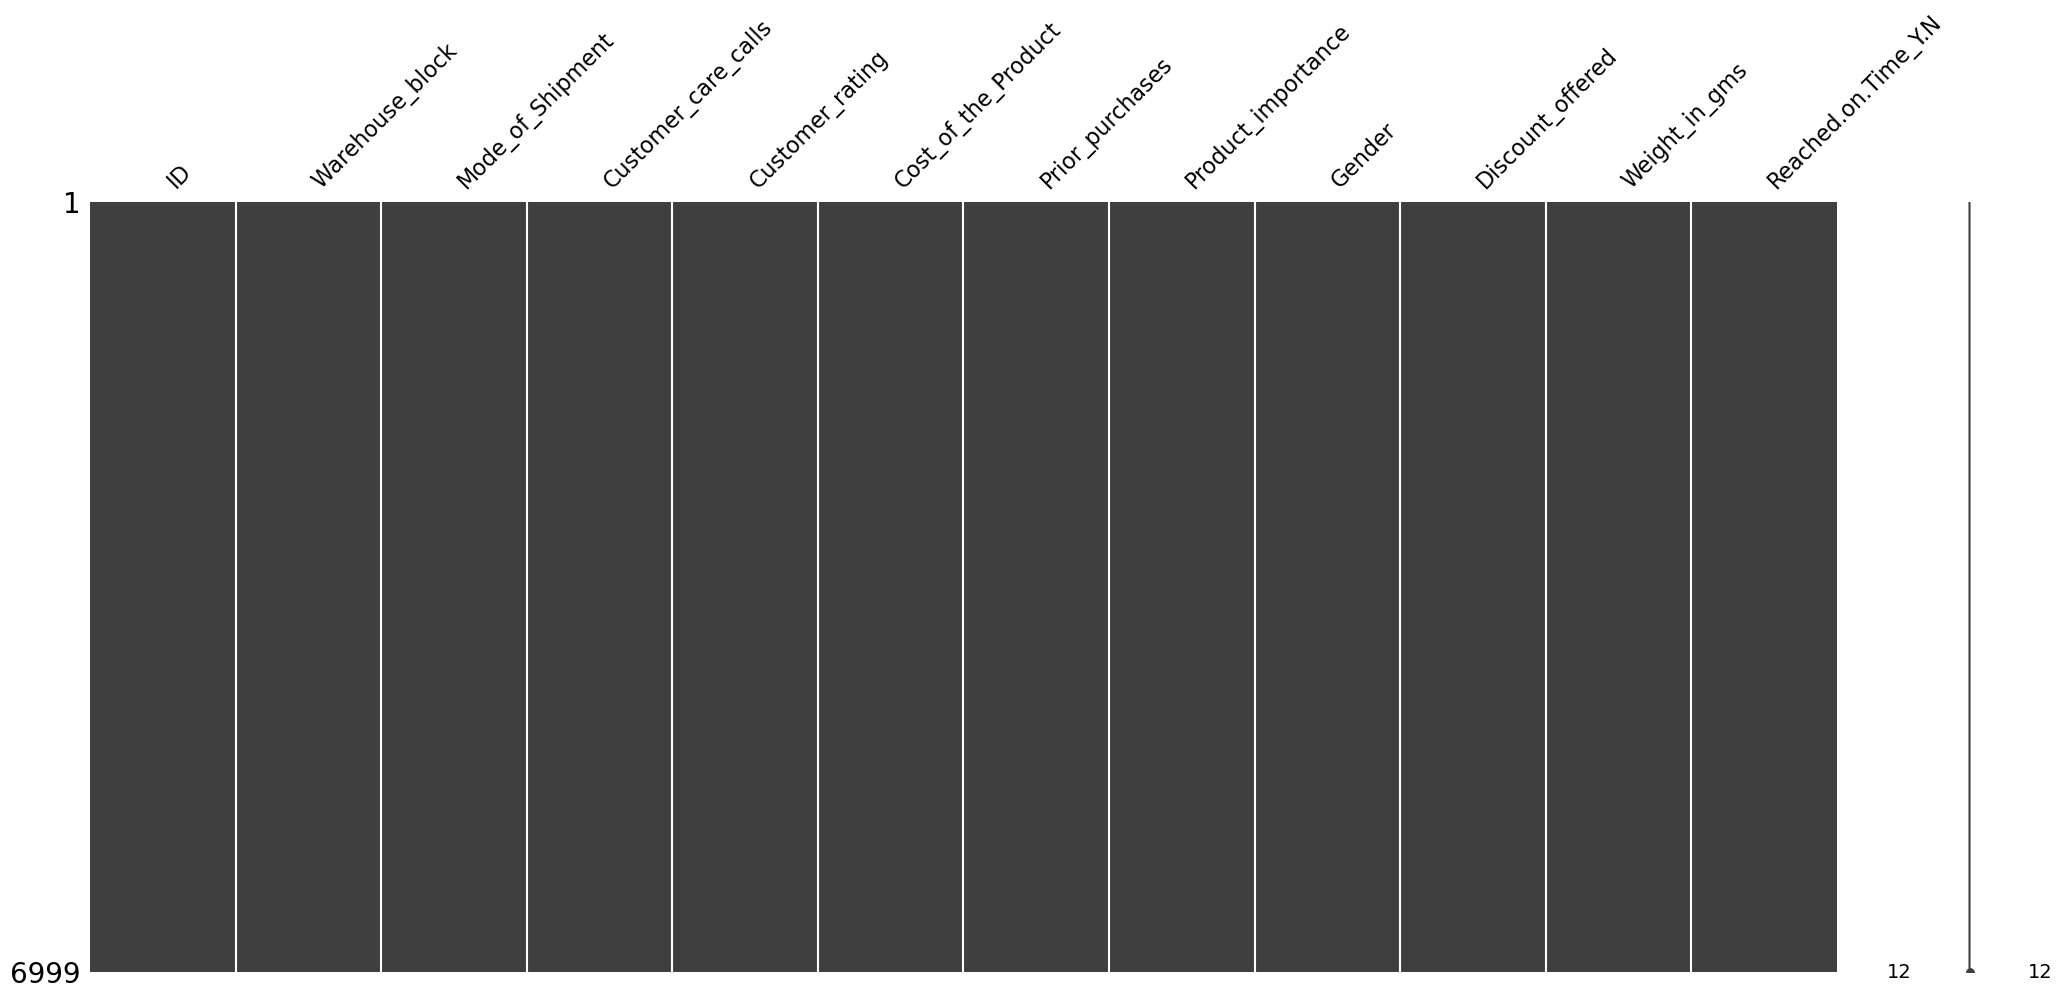

In [42]:
msno.matrix(train)

In [43]:
train.corr()

C:\Users\heewo\AppData\Local\Temp\ipykernel_20604\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
ID,1.000000,0.010603,-0.000533,0.006460,0.016337,-0.002613,-0.014909
Customer_care_calls,0.010603,1.000000,0.009423,0.144350,0.059339,-0.046734,-0.061375
Customer_rating,-0.000533,0.009423,1.000000,0.006108,0.013079,-0.010548,0.001127
Cost_of_the_Product,0.006460,0.144350,0.006108,1.000000,0.095558,-0.080011,-0.068100
Prior_purchases,0.016337,0.059339,0.013079,0.095558,1.000000,-0.033104,-0.032579
Discount_offered,-0.002613,-0.046734,-0.010548,-0.080011,-0.033104,1.000000,0.242017
Reached.on.Time_Y.N,-0.014909,-0.061375,0.001127,-0.068100,-0.032579,0.242017,1.000000


In [44]:
# 상관관계가 높은 데이터를 가지고 피봇테이블을 만들어보자
pt1 = train.pivot_table(values='Cost_of_the_Product', # 데이터로 사용할 데이터 지정
                       index=['Customer_care_calls'], # 인덱스를 설정하겠다(멀티 인덱스)
                        # 생존 여부에 영향을 많이 미치는 성별도 추가
                        # 인덱스를 설정할 때 1차로 Pclass로 나눈 뒤 성별로 한번 더 나눔
                        aggfunc='mean' # 데이터 요약시 사용하는 함수를 지정
                        # (mean / sum / count)
                       )
pt1
pt1_sorted = pt1.sort_values(by='Cost_of_the_Product', ascending=False)
pt1_sorted




,Cost_of_the_Product
Customer_care_calls,
7.0,277.658120
6.0,246.665323
5.0,215.332171
0.0,210.540609
4.0,205.936219
3.0,198.543827
2.0,185.644599


 - 상품의 금액이 클수록 문의 전화가 많이 왔다.

In [45]:
pt1 = train.pivot_table(values='Discount_offered',
                       index=['Reached.on.Time_Y.N',],
                       aggfunc='mean')

pt1_sorted_descending = pt1.sort_values(by='Reached.on.Time_Y.N', ascending=False)

pt1_sorted_descending

,Discount_offered
Reached.on.Time_Y.N,
1,9.194858
0,2.731054


- 할인제공 물품과 제때 배송 여부와 관계도가 가장 깊어보임
- 두번째로 상품의 금액이 높을수록 배송 여부 높음
- 세번째로 고객 전화가 연관성 높음 

In [46]:
# train 데이터 검토
train['Customer_rating'].unique()

array([2, 3, 1, 5, 4], dtype=int64)

In [47]:
train['Customer_rating'].describe()

count    6999.000000
mean        2.996285
std         1.410161
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer_rating, dtype: float64

## 필요없는 컬럼 제거

In [48]:
# train 에서 필요없는 컬럼 제거
# 'ID' 컬럼 삭제

# 이미 삭제되어있다면 실행 안됨  
train.drop('ID', axis=1, inplace=True)
train.drop('Gender', axis=1, inplace=True)

In [49]:
# Weight_in_gms 뺀 데이터
train.drop('Weight_in_gms', axis=1, inplace=True)


In [50]:
train['Weight_in_gms']

KeyError: 'Weight_in_gms'

In [52]:

# 범주형 데이터만 뽑기
train_ob=train.select_dtypes(include=['object'])
train_ob

,Warehouse_block,Mode_of_Shipment,Product_importance
0,C,Ship,low
1,F,Flight,low
2,F,Ship,low
3,F,Ship,medium
4,D,Flight,high
...,...,...,...
6994,D,Ship,medium
6995,F,Ship,medium
6996,D,Ship,low
6997,A,Road,medium


In [53]:
# 원핫 인코딩
X_train = pd.get_dummies(train)

In [54]:
X_train['Mode_of_Shipment_?']

0       0
1       0
2       0
3       0
4       0
       ..
6994    0
6995    0
6996    0
6997    0
6998    0
Name: Mode_of_Shipment_?, Length: 6999, dtype: uint8

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_care_calls        6999 non-null   float64
 1   Customer_rating            6999 non-null   int64  
 2   Cost_of_the_Product        6999 non-null   int64  
 3   Prior_purchases            6999 non-null   float64
 4   Discount_offered           6999 non-null   float64
 5   Reached.on.Time_Y.N        6999 non-null   int64  
 6   Warehouse_block _A         6999 non-null   uint8  
 7   Warehouse_block _B         6999 non-null   uint8  
 8   Warehouse_block _C         6999 non-null   uint8  
 9   Warehouse_block _D         6999 non-null   uint8  
 10  Warehouse_block _F         6999 non-null   uint8  
 11  Mode_of_Shipment_?         6999 non-null   uint8  
 12  Mode_of_Shipment_Flight    6999 non-null   uint8  
 13  Mode_of_Shipment_Road      6999 non-null   uint8

In [56]:
X_train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_?,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_?,Product_importance_high,Product_importance_low,Product_importance_medium
Customer_care_calls,1.000000,0.009423,0.144350,0.059339,-0.046734,-0.061375,0.010856,-0.018672,0.003755,-0.001439,0.004297,-0.020663,0.013443,0.011019,-0.008596,-0.007922,-0.034266,0.030049,-0.009467
Customer_rating,0.009423,1.000000,0.006108,0.013079,-0.010548,0.001127,-0.004241,0.002265,-0.000973,0.009332,-0.005045,0.012354,-0.000894,-0.005619,-0.000899,0.018514,0.006696,-0.003362,-0.004696
Cost_of_the_Product,0.144350,0.006108,1.000000,0.095558,-0.080011,-0.068100,-0.023988,0.017234,0.025387,0.007850,-0.021040,-0.008028,-0.017730,0.020011,0.001863,0.005720,-0.033712,0.041745,-0.024814
Prior_purchases,0.059339,0.013079,0.095558,1.000000,-0.033104,-0.032579,-0.000342,-0.004824,0.006172,0.010176,-0.008899,0.012909,0.020216,0.004899,-0.024769,0.005979,0.007998,-0.008829,0.003067
Discount_offered,-0.046734,-0.010548,-0.080011,-0.033104,1.000000,0.242017,0.005721,0.000559,-0.012601,0.018049,-0.009253,-0.010255,0.000711,0.004185,0.001131,-0.000164,0.022519,-0.018819,0.006552
Reached.on.Time_Y.N,-0.061375,0.001127,-0.068100,-0.032579,0.242017,1.000000,-0.011003,0.008610,0.007706,0.018296,-0.018720,-0.029549,0.005365,0.003348,0.007356,-0.001697,0.024041,-0.012308,-0.000506
Warehouse_block _A,0.010856,-0.004241,-0.023988,-0.000342,0.005721,-0.011003,1.000000,-0.200306,-0.202576,-0.200926,-0.315204,0.000738,0.002744,0.001605,-0.003594,-0.010698,0.005182,0.014481,-0.014973
Warehouse_block _B,-0.018672,0.002265,0.017234,-0.004824,0.000559,0.008610,-0.200306,1.000000,-0.201330,-0.199691,-0.313267,-0.010132,-0.007195,0.001446,0.009010,0.002942,-0.013011,-0.017180,0.023877
Warehouse_block _C,0.003755,-0.000973,0.025387,0.006172,-0.012601,0.007706,-0.202576,-0.201330,1.000000,-0.201953,-0.316816,-0.008652,-0.003143,0.004201,0.003230,-0.001334,0.001247,0.002393,-0.002794
Warehouse_block _D,-0.001439,0.009332,0.007850,0.010176,0.018049,0.018296,-0.200926,-0.199691,-0.201953,1.000000,-0.314236,-0.002127,-0.000599,0.001526,0.000294,-0.017003,0.005880,-0.002468,0.003250


In [57]:
# 'Reached.on.Time_Y.N' 컬럼을 맨 위로 옮기기
corr_matrix = X_train.corr()
reordered_columns = ['Reached.on.Time_Y.N'] + [col for col in corr_matrix.columns if col != 'Reached.on.Time_Y.N']
corr_matrix = corr_matrix[reordered_columns]
corr_matrix

,Reached.on.Time_Y.N,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Mode_of_Shipment_?,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_?,Product_importance_high,Product_importance_low,Product_importance_medium
Customer_care_calls,-0.061375,1.000000,0.009423,0.144350,0.059339,-0.046734,0.010856,-0.018672,0.003755,-0.001439,0.004297,-0.020663,0.013443,0.011019,-0.008596,-0.007922,-0.034266,0.030049,-0.009467
Customer_rating,0.001127,0.009423,1.000000,0.006108,0.013079,-0.010548,-0.004241,0.002265,-0.000973,0.009332,-0.005045,0.012354,-0.000894,-0.005619,-0.000899,0.018514,0.006696,-0.003362,-0.004696
Cost_of_the_Product,-0.068100,0.144350,0.006108,1.000000,0.095558,-0.080011,-0.023988,0.017234,0.025387,0.007850,-0.021040,-0.008028,-0.017730,0.020011,0.001863,0.005720,-0.033712,0.041745,-0.024814
Prior_purchases,-0.032579,0.059339,0.013079,0.095558,1.000000,-0.033104,-0.000342,-0.004824,0.006172,0.010176,-0.008899,0.012909,0.020216,0.004899,-0.024769,0.005979,0.007998,-0.008829,0.003067
Discount_offered,0.242017,-0.046734,-0.010548,-0.080011,-0.033104,1.000000,0.005721,0.000559,-0.012601,0.018049,-0.009253,-0.010255,0.000711,0.004185,0.001131,-0.000164,0.022519,-0.018819,0.006552
Reached.on.Time_Y.N,1.000000,-0.061375,0.001127,-0.068100,-0.032579,0.242017,-0.011003,0.008610,0.007706,0.018296,-0.018720,-0.029549,0.005365,0.003348,0.007356,-0.001697,0.024041,-0.012308,-0.000506
Warehouse_block _A,-0.011003,0.010856,-0.004241,-0.023988,-0.000342,0.005721,1.000000,-0.200306,-0.202576,-0.200926,-0.315204,0.000738,0.002744,0.001605,-0.003594,-0.010698,0.005182,0.014481,-0.014973
Warehouse_block _B,0.008610,-0.018672,0.002265,0.017234,-0.004824,0.000559,-0.200306,1.000000,-0.201330,-0.199691,-0.313267,-0.010132,-0.007195,0.001446,0.009010,0.002942,-0.013011,-0.017180,0.023877
Warehouse_block _C,0.007706,0.003755,-0.000973,0.025387,0.006172,-0.012601,-0.202576,-0.201330,1.000000,-0.201953,-0.316816,-0.008652,-0.003143,0.004201,0.003230,-0.001334,0.001247,0.002393,-0.002794
Warehouse_block _D,0.018296,-0.001439,0.009332,0.007850,0.010176,0.018049,-0.200926,-0.199691,-0.201953,1.000000,-0.314236,-0.002127,-0.000599,0.001526,0.000294,-0.017003,0.005880,-0.002468,0.003250


In [58]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Reached.on.Time_Y.N
0,C,Ship,2.0,2,135,3.0,low,0.0,1
1,F,Flight,5.0,3,225,5.0,low,6.0,0
2,F,Ship,3.0,1,229,3.0,low,0.0,1
3,F,Ship,3.0,2,228,0.0,medium,2.0,0
4,D,Flight,0.0,1,195,6.0,high,0.0,1
...,...,...,...,...,...,...,...,...,...
6994,D,Ship,4.0,2,232,5.0,medium,4.0,0
6995,F,Ship,3.0,5,228,2.0,medium,0.0,0
6996,D,Ship,0.0,1,300,5.0,low,10.0,0
6997,A,Road,3.0,1,232,2.0,medium,0.0,0


**Reached.on.Time_Y.N 높음**  
1. Discount_offered (0.242017)
2. Mode_of_Shipment_? (0.029549)
3. Product_importance_high (0.024041)  
4. Cost_of_the_Product (0.068100)
5. Mode_of_Shipment_ Shipzk  (-0.020478) 하나밖에 없는데이터라 높게 나온듯  - ship 으로 변경  

- 제품 무게는 고려 하지 않음

**그외 볼만한 관계**  
Mode_of_Shipment_? = 제품 중요도 임포턴스에서는 관계도가 낮으나 미디움과 로우 에서 높은걸로 보아 
Product_importance_high	일 가능성 낮음  
중요하지 않은 물품들을 운송수단 남는 공간에 끼워 보내고 ?로 표기한 것으로 유추 됨 

14% high     
45% midium  
40% low  
관계도 비중  


Customer_care_calls = 이 많을수록 제품 가격과 상관 있음  


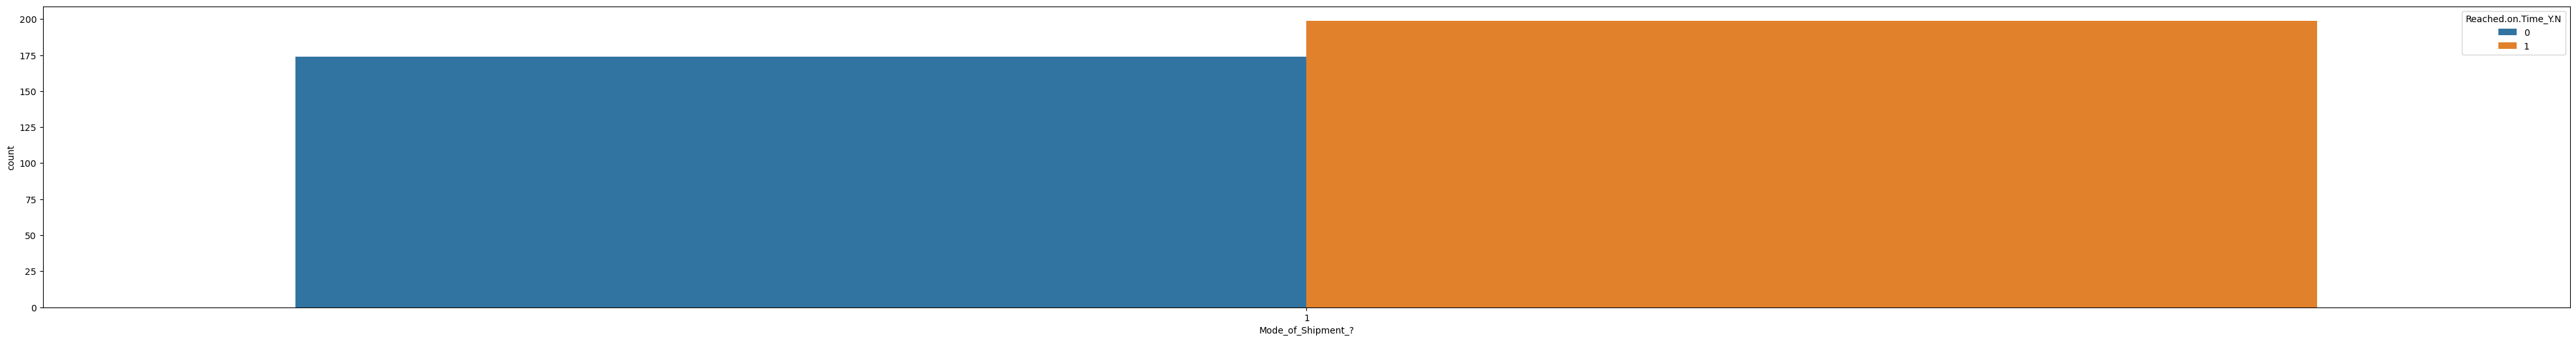

In [60]:
# 'Discount_offered' 값이 0인 데이터를 제외한 데이터프레임 생성
filtered_df = X_train[X_train['Product_importance_?'] ]

# 그래프 크기를 조절합니다. figsize=(가로, 세로) 설정 가능합니다.
plt.figure(figsize=(50, 6))

# countplot을 그립니다.
sns.countplot(data=filtered_df, x='Mode_of_Shipment_?', hue='Reached.on.Time_Y.N')

# 그래프를 보여줍니다.
plt.show()

In [76]:
X_train['Mode_of_Shipment_?'].describe()

count    6999.000000
mean        0.053293
std         0.224634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Mode_of_Shipment_?, dtype: float64

In [ ]:
# 'Discount_offered' 값이 0인 데이터를 제외한 데이터프레임 생성
filtered_df = X_train[X_train['Product_importance_high'] != 0]

# 그래프 크기를 조절합니다. figsize=(가로, 세로) 설정 가능합니다.
plt.figure(figsize=(10, 6))

# countplot을 그립니다.
sns.countplot(data=filtered_df, x='Product_importance_high')

# 그래프를 보여줍니다.
plt.show()

In [ ]:
X_train.info()

In [ ]:
X_train['Product_importance_?'].describe()
non_zero_count = (X_train['Product_importance_?'] != 0).sum()
non_zero_count

In [ ]:
train_ques=train[train['Product_importance'] == '?']
(train_ques['Reached.on.Time_Y.N'] == 1).sum()


In [ ]:
pd.set_option('display.max_rows', None)  # 모든 행을 출력
pd.set_option('display.max_columns', None)  # 모든 열을 출력

In [ ]:
X_train.info()

In [ ]:
data = X_train

In [ ]:
# 값이 0인거 제외
f_data=data[data['Customer_care_calls'] != 0]

plt.figure(figsize=(30, 10))
sns.countplot(f_data, # 데이터 프레임 넣어주는 곳
              x='Customer_care_calls', # x축에 데이터를 넣어주는 곳
              hue = 'Reached.on.Time_Y.N' # 해당하는 컬럼의 값들 개수가  bar차트로 출력되게 만들어주는 부분 + 범례
    
             )
# 범례 추가

plt.show()


In [ ]:
# 값이 0인거 제외
f_data=data[data['Cost_of_the_Product'] != 0]

plt.figure(figsize=(80, 10))
sns.countplot(f_data, # 데이터 프레임 넣어주는 곳
              x='Cost_of_the_Product', # x축에 데이터를 넣어주는 곳
              hue = 'Reached.on.Time_Y.N' # 해당하는 컬럼의 값들 개수가  bar차트로 출력되게 만들어주는 부분 + 범례
    
             )
# 범례 추가

plt.show()


In [ ]:
# 값이 0인거 제외
f_data=data[data['Discount_offered'] != 0]

plt.figure(figsize=(50, 10))
sns.countplot(f_data, # 데이터 프레임 넣어주는 곳
              x='Discount_offered', # x축에 데이터를 넣어주는 곳
              hue = 'Reached.on.Time_Y.N' # 해당하는 컬럼의 값들 개수가  bar차트로 출력되게 만들어주는 부분 + 범례
    
             )
# 범례 추가

plt.show()


In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Discount_offered     6999 non-null   float64
 8   Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 492.2+ KB


In [78]:
# '?' 값을 대체하기 위한 비율 설정
high_ratio = 0.14
medium_ratio = 0.45
low_ratio = 0.40

# 랜덤으로 값을 선택하여 '?' 값 대체
np.random.seed(0)  # 재현 가능한 결과를 위해 시드 설정

# '?' 값을 대체하는 함수 정의
def replace_question_mark():
    rand_val = np.random.rand()
    if rand_val < high_ratio:
        return 'High'
    elif rand_val < high_ratio + medium_ratio:
        return 'Medium'
    else:
        return 'Low'

# '?' 값을 랜덤하게 대체
question_mark_indexes = train[train['Product_importance'] == '?'].index
train.loc[question_mark_indexes, 'Product_importance'] = [replace_question_mark() for _ in question_mark_indexes]
